## Data Analysis For Amazon Sales 🛒📈📊

In [109]:
import pandas as pd
df = pd.read_csv('Amazon_Sales.csv')
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\3930560979.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon_Sales.csv')


,i,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


### Cleaning and Preprocessing Dataset


In [110]:
df.groupby(['Status','Courier Status']).agg({'Status':'count','Courier Status':'count','Amount':'sum'})

Status  Courier Status  \
Status                        Courier Status                           
Cancelled                     Cancelled         5840            5840   
                              Unshipped         5631            5631   
Pending                       Cancelled            2               2   
                              Shipped             10              10   
                              Unshipped          646             646   
Pending - Waiting for Pick Up Unshipped          281             281   
Shipped                       Cancelled           93              93   
                              Shipped          77596           77596   
                              Unshipped          115             115   
Shipped - Damaged             Shipped              1               1   
Shipped - Delivered to Buyer  Shipped          28761           28761   
Shipped - Lost in Transit     Shipped              5               5   
Shipped - Out for Delivery    Shipped             35              35   
Shipped - Picked Up           Shipped            973             973   
Shipped - Rejected by Buyer   Shipped             11              11   
Shipped - Returned to Seller  Shipped           1950            1950   
Shipped - Returning to Seller Shipped            145             145   
Shipping                      Unshipped            8               8   

                                                  Amount  
Status                        Courier Status              
Cancelled                     Cancelled              0.0  
                              Unshipped        3729112.0  
Pending                       Cancelled              0.0  
                              Shipped             7679.0  
                              Unshipped         422592.0  
Pending - Waiting for Pick Up Unshipped         192138.0  
Shipped                       Cancelled              0.0  
                              Shipped         50324255.0  
                              Unshipped              0.0  
Shipped - Damaged             Shipped             1136.0  
Shipped - Delivered to Buyer  Shipped         18650815.0  
Shipped - Lost in Transit     Shipped             1997.0  
Shipped - Out for Delivery    Shipped            26971.0  
Shipped - Picked Up           Shipped           661252.0  
Shipped - Rejected by Buyer   Shipped             7295.0  
Shipped - Returned to Seller  Shipped          1269644.0  
Shipped - Returning to Seller Shipped           107620.0  
Shipping                      Unshipped              0.0

In [111]:
df=df.drop('i',axis=1)
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [112]:
df.shape

(128975, 23)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [114]:
df.duplicated().sum()#6
df = df.drop_duplicates()#0


In [115]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
Unnamed: 22           49048
dtype: int64

In [116]:
df['Courier Status'].value_counts()

Courier Status
Shipped      109484
Unshipped      6681
Cancelled      5932
Name: count, dtype: int64

In [117]:
# to Know what is canseled and what unshaped we should know duplicated values in Order Id
Order_duplicates=df[df['Order ID'].duplicated(keep=False)]
Order_duplicates # Order Id contain duplicated values that customer buy more than product in the same order

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
37,403-4367956-2849158,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,S,...,INR,487.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
38,403-4367956-2849158,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,S,...,INR,368.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
61,404-2262140-4696366,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,M,...,INR,518.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
62,404-2262140-4696366,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3579,JNE3579-KR-M,kurta,M,...,INR,295.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
79,408-4069830-3819562,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,SET288,SET288-KR-NP-XXXL,Set,3XL,...,INR,684.0,Kolkata,WEST BENGAL,700048.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128930,407-8519205-5064368,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XL,Set,XL,...,INR,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128941,403-3035549-4142738,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXL,Top,XXL,...,INR,529.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128942,403-3035549-4142738,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,XXL,...,INR,518.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128952,404-8878574-4524358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-M,kurta,M,...,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [118]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [119]:
print(df['Order ID'].duplicated().sum())
Order_duplicates.shape         

8591


(15431, 23)

In [120]:
for col in df.columns:
    print(f'{col} => {df[col].duplicated().sum()}')

Order ID => 8591
Date => 128878
Status => 128956
Fulfilment => 128967
Sales Channel  => 128967
ship-service-level => 128967
Style => 127592
SKU => 121774
Category => 128960
Size => 128958
ASIN => 121779
Courier Status => 128965
Qty => 128959
currency => 128967
Amount => 127558
ship-city => 120013
ship-state => 128899
ship-postal-code => 119509
ship-country => 128967
promotion-ids => 123181
B2B => 128967
fulfilled-by => 128967
Unnamed: 22 => 128967


In [121]:
df['Sales Channel '].value_counts()

Sales Channel 
Amazon.in     128845
Non-Amazon       124
Name: count, dtype: int64

In [122]:
df['Qty'].value_counts()

Qty
1     115777
0      12804
2        341
3         32
4          9
5          2
9          1
15         1
13         1
8          1
Name: count, dtype: int64

In [123]:
import numpy as np
sum=0
for rec1 , rec2 in zip(df['Courier Status'], df['Qty']):
    if( rec1 == 'Cancelled' ) and rec2 == 0:
        sum+=1
print(sum)
c=df['Courier Status'].isnull().sum()
print(sum+c) #it is all count of cancelled values 0 in Qty

5932
12804


In [124]:
new_df=df.drop(['ship-country','currency','promotion-ids','fulfilled-by','Unnamed: 22'],axis=1)
ne_df=new_df.sort_values(by='Order ID')
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,False


In [125]:
# new_df['Status','Courier Status','Qty']
sum1=0
sum2=0
sum3=0
status=pd.DataFrame(new_df,columns=['Status','Courier Status','Qty']);status
for i,j in zip(status['Status'],status['Courier Status']):
    if (i=='Cancelled') and j=='Shipped':
        sum1+=1
    if (i=='Shipped') and j=='Cancelled':
        sum2+=1
    if (i=='Shipped - Delivered to Buyer') and j=='Shipped':
        sum3+=1
print(sum1)
print(sum2)
print(sum3)
status

0
93
28761


,Status,Courier Status,Qty
0,Cancelled,NaN,0
1,Shipped - Delivered to Buyer,Shipped,1
2,Shipped,Shipped,1
3,Cancelled,NaN,0
4,Shipped,Shipped,1
...,...,...,...
128970,Shipped,Shipped,1
128971,Shipped,Shipped,1
128972,Shipped,Shipped,1
128973,Shipped,Shipped,1


In [126]:
new_df['Courier Status'].fillna(df['Status'],inplace=True)
new_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\3745581434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['Courier Status'].fillna(df['Status'],inplace=True)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,False


In [127]:
status['Courier Status'].value_counts()

Courier Status
Shipped      109484
Unshipped      6681
Cancelled      5932
Name: count, dtype: int64

In [128]:
new_df['Courier Status'].value_counts()

Courier Status
Shipped                         109484
Cancelled                        12793
Unshipped                         6681
Shipped - Delivered to Buyer         8
Shipped - Returned to Seller         3
Name: count, dtype: int64

In [129]:
new_df['Courier Status']=new_df['Courier Status'].str.replace('Shipped - Delivered to Buyer','Shipped')
new_df['Courier Status']=new_df['Courier Status'].str.replace('Shipped - Returned to Seller','Unshipped')
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,False


In [130]:
new_df['Courier Status'].value_counts()

Courier Status
Shipped      109492
Cancelled     12793
Unshipped      6684
Name: count, dtype: int64

In [131]:
# To handel Courier Status , Qty and Amount
new_df['Qty'] = new_df.apply(lambda row: 0 if row['Courier Status'] == 'Cancelled' else row['Qty'], axis=1)
new_df['Amount'] = new_df.apply(lambda row: 0 if row['Courier Status'] == 'Cancelled' else row['Amount'], axis=1)
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,0.0,MUMBAI,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.0,Halol,Gujarat,389350.0,False


In [132]:
# check data after cleaning 
new_df.isnull().sum()

Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Style                   0
SKU                     0
Category                0
Size                    0
ASIN                    0
Courier Status          0
Qty                     0
Amount                135
ship-city              33
ship-state             33
ship-postal-code       33
B2B                     0
dtype: int64

In [133]:
#print rows that have null values
new_df[new_df.isnull().any(axis=1)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
937,S02-5278980-4327051,4/30/2022,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,B077Z7WDXN,Unshipped,15,NaN,Surat,Gujarat,394210.0,False
1057,S02-9107114-0460608,4/30/2022,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,XL,B09RKDN6S4,Unshipped,2,NaN,Surat,Gujarat,394210.0,False
1871,404-0566904-4825137,4/29/2022,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,493.0,NaN,NaN,NaN,False
1872,404-0566904-4825137,4/29/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,458.0,NaN,NaN,NaN,False
3631,S02-1006261-5356758,4/28/2022,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-L,kurta,L,B07GRSCXCP,Unshipped,9,NaN,Surat,Gujarat,394210.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124617,S02-3811761-8377519,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,XS,B08VWKSVV7,Unshipped,2,NaN,Surat,Gujarat,394210.0,False
124619,S02-5216693-3162561,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,SET154,SET154-KR-NP-XXL,Set,XXL,B082PXQ5BL,Unshipped,1,NaN,Surat,Gujarat,394210.0,False
124621,S02-7324586-1573702,6/4/2022,Shipped,Amazon,Non-Amazon,Standard,SET097,SET097-KR-PP-XXXL,Set,3XL,B07TD8TBPC,Unshipped,1,NaN,Surat,Gujarat,394210.0,False
125385,403-5172380-9787567,6/3/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3366,JNE3366-KR-1053-L,kurta,L,B07T65WM8Q,Shipped,1,376.0,NaN,NaN,NaN,False


In [134]:
new_df['Amount']=new_df['Amount'].fillna(new_df['Amount'].mean())

In [135]:
new_df['ship-city'].value_counts()#BENGALURU max count
new_df['ship-city'].fillna('BENGALURU',inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\2266649116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['ship-city'].fillna('BENGALURU',inplace=True)


In [136]:
new_df['ship-state'].value_counts()#MAHARASHTRA max count
new_df['ship-state'].fillna('MAHARASHTRA',inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\2557052631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['ship-state'].fillna('MAHARASHTRA',inplace=True)


In [137]:
new_df['ship-postal-code'].value_counts()#201301.0 max count
new_df['ship-postal-code'].fillna(201301.0,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11356\3025861487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['ship-postal-code'].fillna(201301.0,inplace=True)


In [138]:
new_df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
B2B                   0
dtype: int64

In [139]:
new_df['ship-city']=new_df['ship-city'].str.capitalize()
new_df['ship-state']=new_df['ship-state'].str.capitalize()

In [140]:
# Final Data set after cleaning
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,0.0,Mumbai,Maharashtra,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,Bengaluru,Karnataka,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,Navi mumbai,Maharashtra,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,0.0,Puducherry,Puducherry,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,Chennai,Tamil nadu,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,Hyderabad,Telangana,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,Gurugram,Haryana,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,Hyderabad,Telangana,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.0,Halol,Gujarat,389350.0,False


In [141]:
new_df.groupby(['Status','Courier Status']).agg({'Status':'count','Courier Status':'count','Amount':'sum'})
#we Should handel all ['Status','Courier Status'] to know according what we should calculate amount and other workes

Status  Courier Status  \
Status                        Courier Status                           
Cancelled                     Cancelled        12698           12698   
                              Unshipped         5631            5631   
Pending                       Cancelled            2               2   
                              Shipped             10              10   
                              Unshipped          646             646   
Pending - Waiting for Pick Up Unshipped          281             281   
Shipped                       Cancelled           93              93   
                              Shipped          77593           77593   
                              Unshipped          115             115   
Shipped - Damaged             Shipped              1               1   
Shipped - Delivered to Buyer  Shipped          28769           28769   
Shipped - Lost in Transit     Shipped              5               5   
Shipped - Out for Delivery    Shipped             35              35   
Shipped - Picked Up           Shipped            973             973   
Shipped - Rejected by Buyer   Shipped             11              11   
Shipped - Returned to Seller  Shipped           1950            1950   
                              Unshipped            3               3   
Shipped - Returning to Seller Shipped            145             145   
Shipping                      Unshipped            8               8   

                                                    Amount  
Status                        Courier Status                
Cancelled                     Cancelled       0.000000e+00  
                              Unshipped       3.729697e+06  
Pending                       Cancelled       0.000000e+00  
                              Shipped         7.679000e+03  
                              Unshipped       4.225920e+05  
Pending - Waiting for Pick Up Unshipped       1.921380e+05  
Shipped                       Cancelled       0.000000e+00  
                              Shipped         5.032162e+07  
                              Unshipped       6.730355e+04  
Shipped - Damaged             Shipped         1.136000e+03  
Shipped - Delivered to Buyer  Shipped         1.865550e+07  
Shipped - Lost in Transit     Shipped         1.997000e+03  
Shipped - Out for Delivery    Shipped         2.697100e+04  
Shipped - Picked Up           Shipped         6.612520e+05  
Shipped - Rejected by Buyer   Shipped         7.295000e+03  
Shipped - Returned to Seller  Shipped         1.269644e+06  
                              Unshipped       1.755745e+03  
Shipped - Returning to Seller Shipped         1.076200e+05  
Shipping                      Unshipped       4.681986e+03

In [142]:
new_df['Status'].value_counts()

Status
Shipped                          77801
Shipped - Delivered to Buyer     28769
Cancelled                        18329
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [143]:
new_df['Status']=new_df['Status'].str.replace('Pending - Waiting for Pick Up','Pending')

In [144]:
new_df['Status']=new_df['Status'].str.replace('Shipped - Returned to Seller','Cancelled')

In [145]:
new_df['Status']=new_df.apply(lambda x:'Shipped' if x['Status'][:4]=='Ship' else x['Status'] , axis=1)


In [146]:
new_df['Status'].value_counts()

Status
Shipped      107748
Cancelled     20282
Pending         939
Name: count, dtype: int64

In [147]:
new_df['Courier Status'].value_counts()

Courier Status
Shipped      109492
Cancelled     12793
Unshipped      6684
Name: count, dtype: int64

In [148]:
new_df.groupby(['Status','Courier Status']).agg({'Status':'count','Courier Status':'count','Amount':'sum'})

Status  Courier Status        Amount
Status    Courier Status                                      
Cancelled Cancelled        12698           12698  0.000000e+00
          Shipped           1950            1950  1.269644e+06
          Unshipped         5634            5634  3.731453e+06
Pending   Cancelled            2               2  0.000000e+00
          Shipped             10              10  7.679000e+03
          Unshipped          927             927  6.147300e+05
Shipped   Cancelled           93              93  0.000000e+00
          Shipped         107532          107532  6.978339e+07
          Unshipped          123             123  7.198553e+04

### Analysis To decision makeing

In [149]:
# final Dataset to work on 
new_df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Cancelled,0,0.0,Mumbai,Maharashtra,400081.0,False
1,171-9198151-1101146,4/30/2022,Shipped,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,Bengaluru,Karnataka,560085.0,False
2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,Navi mumbai,Maharashtra,410210.0,True
3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Cancelled,0,0.0,Puducherry,Puducherry,605008.0,False
4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,Chennai,Tamil nadu,600073.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,Hyderabad,Telangana,500013.0,False
128971,402-9551604-7544318,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,Gurugram,Haryana,122004.0,False
128972,407-9547469-3152358,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,Hyderabad,Telangana,500049.0,False
128973,402-6184140-0545956,5/31/2022,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.0,Halol,Gujarat,389350.0,False


Text(0.5, 1.0, 'number of orders by months')

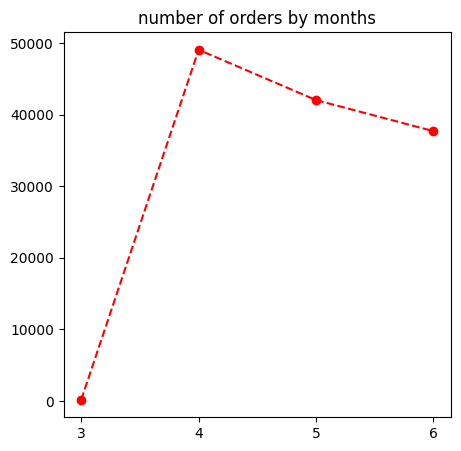

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
months=new_df['Date'].str[:1].value_counts().sort_index()
plt.plot(months,marker='o',color='red',linestyle='--')
plt.title('number of orders by months')

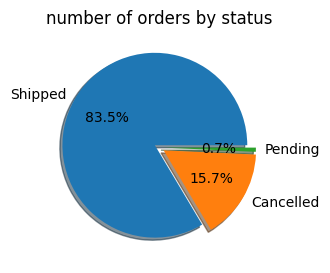

In [151]:
plt.figure(figsize=(4,3))
status=new_df['Status'].value_counts()
plt.pie(status,labels=status.index,autopct='%1.1f%%',explode=(.05,.06,.05),shadow=True)
plt.title('number of orders by status')
plt.show()

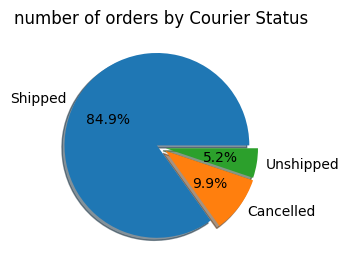

In [152]:
plt.figure(figsize=(4,3))
Courier=new_df['Courier Status'].value_counts()
plt.pie(Courier,labels=Courier.index,autopct='%1.1f%%',explode=(.05,.06,.05),shadow=True)
plt.title('number of orders by Courier Status')
plt.show()

<Axes: xlabel='count', ylabel='Status'>

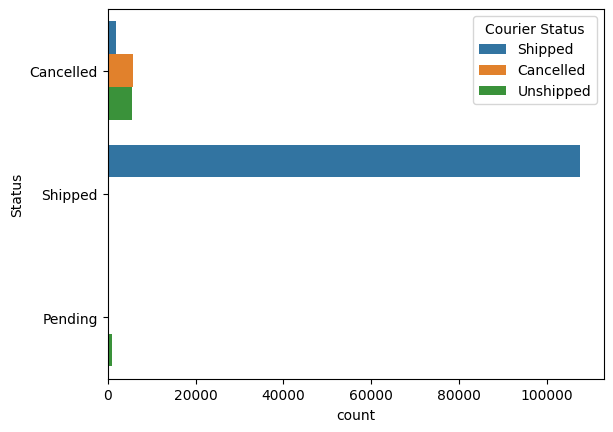

In [153]:
import seaborn as sns
sns.countplot(y=new_df['Status'],hue=df['Courier Status'])
# plt.legend(['Male','Female'])

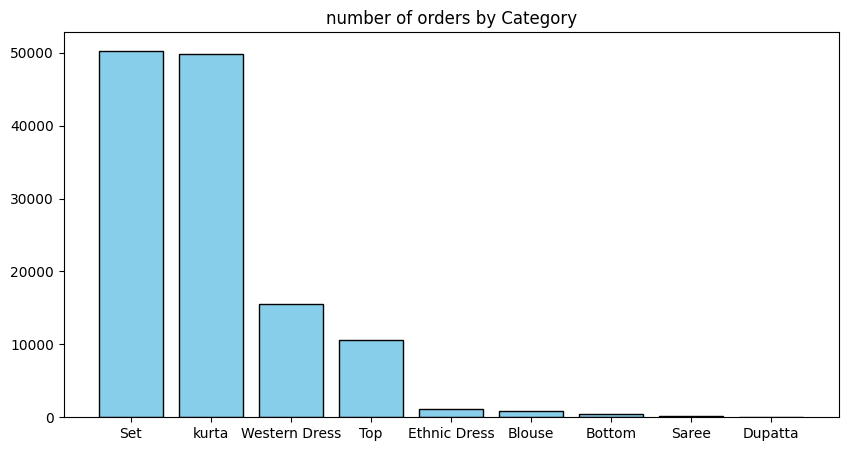

In [154]:
plt.figure(figsize=(10,5))
Cat=new_df['Category'].value_counts()
plt.bar(Cat.index,Cat.values,color='skyblue',edgecolor='black')
plt.title('number of orders by Category')
plt.show()

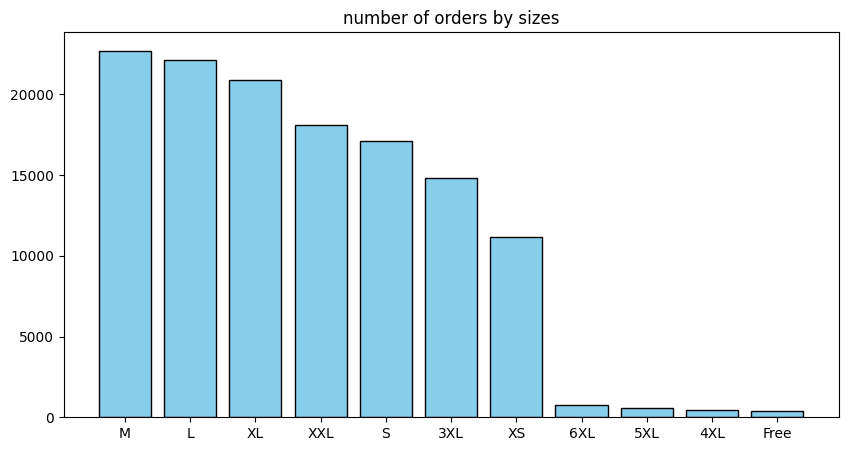

In [155]:
plt.figure(figsize=(10,5))
Cat=new_df['Size'].value_counts()
plt.bar(Cat.index,Cat.values,color='skyblue',edgecolor='black')
plt.title('number of orders by sizes')
plt.show()

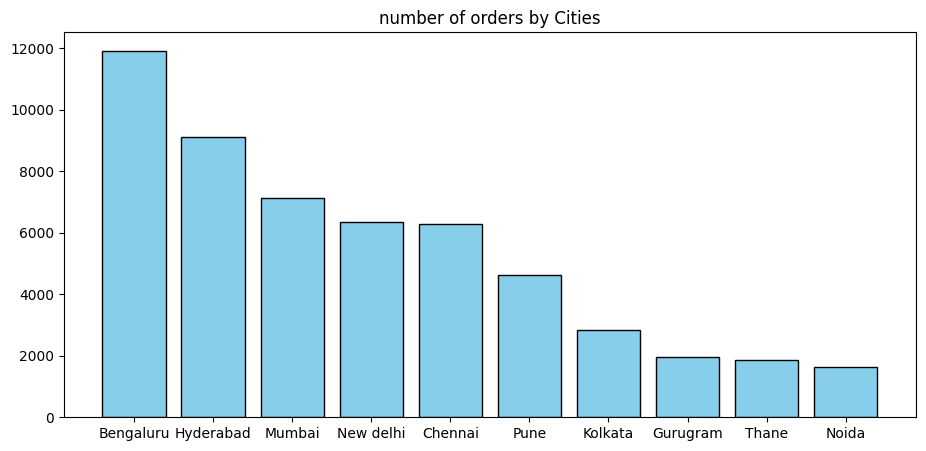

In [167]:
plt.figure(figsize=(11,5))
Cat=new_df['ship-city'].value_counts()[:10]
plt.bar(Cat.index,Cat.values,color='skyblue',edgecolor='black')
plt.title('number of orders by Cities')
plt.show()